# Analysis of Covid-19 Cases in States/UT of India using Linear Regression

## Data Preprocessing

In [108]:
import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [109]:
dataset  = pd.read_csv('dataset/covid_india.csv',header=0)

In [110]:
dataset.head()

,S. No.,Name_of_State_UT,Active_Cases,Cured_Discharged_Migrated,Deaths,Total_Confirmed_Cases
0,1,Andaman and Nicobar,78,4652,61,4791
1,2,Andhra Pradesh,5237,861711,7047,873995
2,3,Arunachal Pradesh,685,15739,55,16479
3,4,Assam,3516,209790,999,214305
4,5,Bihar,5499,233766,1307,240572


In [111]:
dataset=dataset.set_index('S. No.')

In [112]:
dataset.head(10)

,Name_of_State_UT,Active_Cases,Cured_Discharged_Migrated,Deaths,Total_Confirmed_Cases
S. No.,,,,,
1,Andaman and Nicobar,78,4652,61,4791
2,Andhra Pradesh,5237,861711,7047,873995
3,Arunachal Pradesh,685,15739,55,16479
4,Assam,3516,209790,999,214305
5,Bihar,5499,233766,1307,240572
6,Chandigarh,881,17231,298,18410
7,Chhattisgarh,19346,230238,3054,252638
8,Dadra and Nagar Haveli and Daman and Diu,20,3332,2,3354
9,Delhi,18753,572523,9874,601150


In [113]:
dataset.shape

(36, 5)

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name_of_State_UT           36 non-null     object
 1   Active_Cases               36 non-null     int64 
 2   Cured_Discharged_Migrated  36 non-null     int64 
 3   Deaths                     36 non-null     int64 
 4   Total_Confirmed_Cases      36 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ KB


In [115]:
dataset.describe()

,Active_Cases,Cured_Discharged_Migrated,Deaths,Total_Confirmed_Cases
count,36.000000,3.600000e+01,36.000000,3.600000e+01
mean,10104.138889,2.580787e+05,3949.611111,2.721325e+05
std,15661.874362,3.598028e+05,8300.684592,3.799186e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,680.250000,1.685800e+04,254.250000,1.792725e+04
50%,5042.500000,1.272230e+05,1319.500000,1.366645e+05
75%,13374.500000,2.800378e+05,3563.500000,2.960748e+05
max,73001.000000,1.747199e+06,47972.000000,1.868172e+06


In [116]:
dataset.dtypes

Name_of_State_UT             object
Active_Cases                  int64
Cured_Discharged_Migrated     int64
Deaths                        int64
Total_Confirmed_Cases         int64
dtype: object

In [117]:
duplicate_rows_df = dataset[dataset.duplicated()]
print(f"number of duplicate rows:{ duplicate_rows_df.shape}")

number of duplicate rows:(0, 5)


In [118]:
print(dataset.isnull().sum())

Name_of_State_UT             0
Active_Cases                 0
Cured_Discharged_Migrated    0
Deaths                       0
Total_Confirmed_Cases        0
dtype: int64


## Data Visualisation

Text(0.5, 0, 'State/UT')

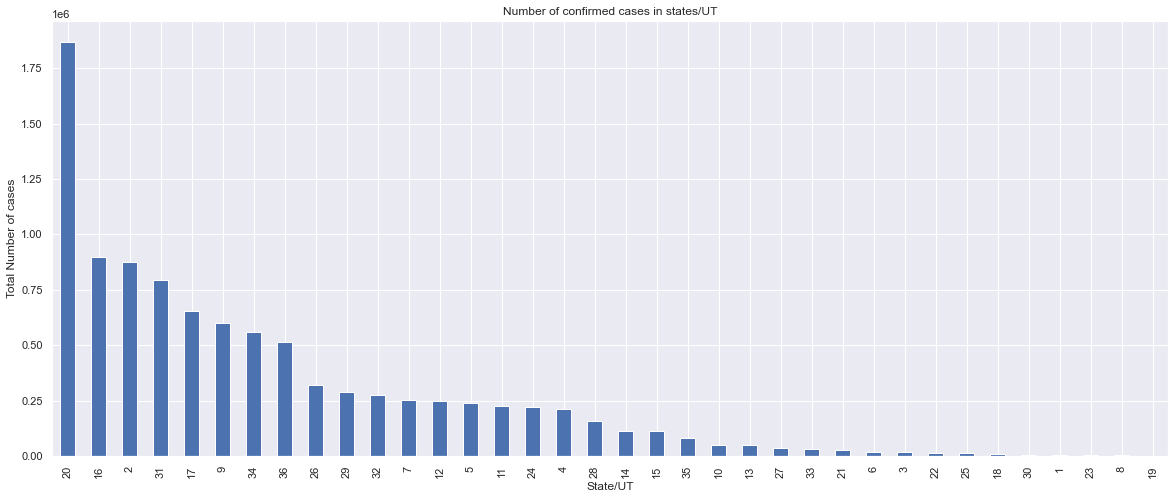

In [153]:
#plotting a bar graph
dataset.Total_Confirmed_Cases.nlargest(36).plot(kind='bar', figsize=(20,8))
plt.title("Number of confirmed cases in states/UT")
plt.ylabel("Total Number of cases")
plt.xlabel("State/UT")

In [122]:
print(dataset['Name_of_State_UT'])

S. No.
1                          Andaman and Nicobar
2                               Andhra Pradesh
3                            Arunachal Pradesh
4                                        Assam
5                                        Bihar
6                                   Chandigarh
7                                 Chhattisgarh
8     Dadra and Nagar Haveli and Daman and Diu
9                                        Delhi
10                                         Goa
11                                     Gujarat
12                                     Haryana
13                            Himachal Pradesh
14                           Jammu and Kashmir
15                                   Jharkhand
16                                   Karnataka
17                                      Kerala
18                                      Ladakh
19                                 Lakshadweep
20                                 Maharashtra
21                                     Manipur
22    

Text(0.5, 0, 'State/UT')

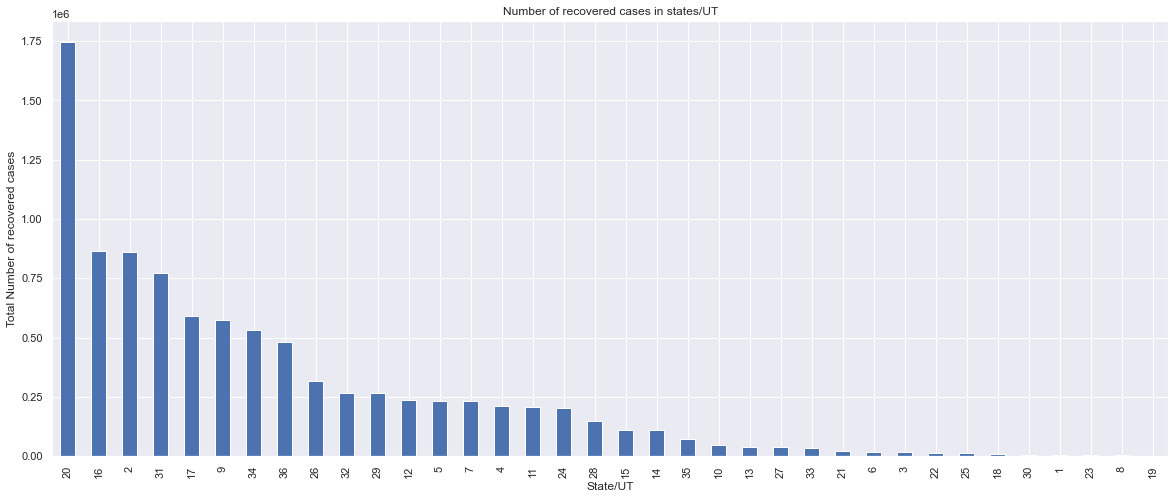

In [123]:
#plotting a bar graph
dataset.Cured_Discharged_Migrated.nlargest(36).plot(kind='bar', figsize=(20,8))
plt.title("Number of recovered cases in states/UT")
plt.ylabel("Total Number of recovered cases")
plt.xlabel("State/UT")

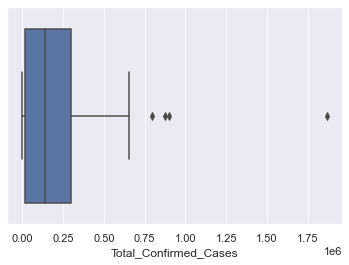

In [124]:
sns.boxplot(x=dataset["Total_Confirmed_Cases"])

,Active_Cases,Cured_Discharged_Migrated,Deaths,Total_Confirmed_Cases
Active_Cases,1.000000,0.794786,0.768493,0.810718
Cured_Discharged_Migrated,0.794786,1.000000,0.905475,0.999600
Deaths,0.768493,0.905475,1.000000,0.911061
Total_Confirmed_Cases,0.810718,0.999600,0.911061,1.000000


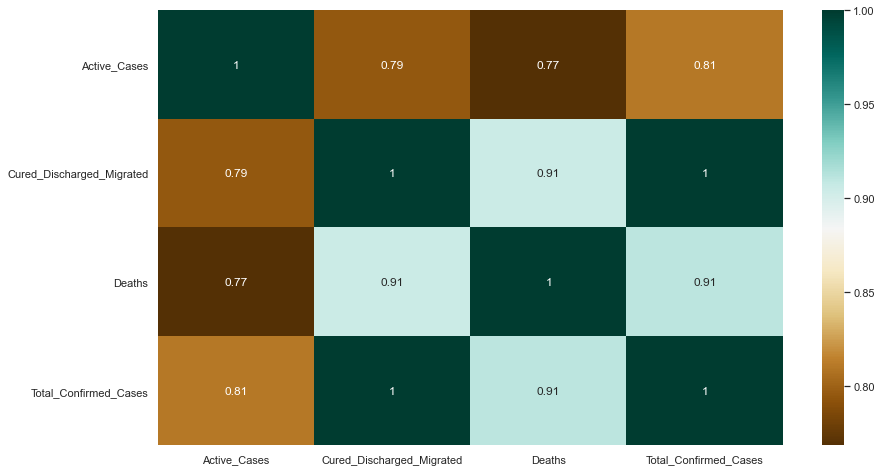

In [76]:
plt.figure(figsize=(14,8))
c= dataset.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

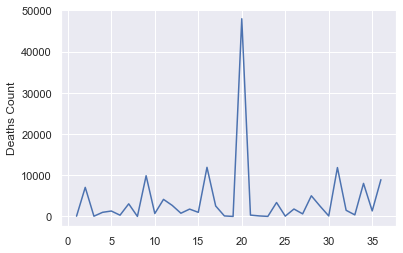

In [125]:
# line graph
plt.plot(dataset["Deaths"][0:36])
plt.ylabel('Deaths Count')
plt.show()

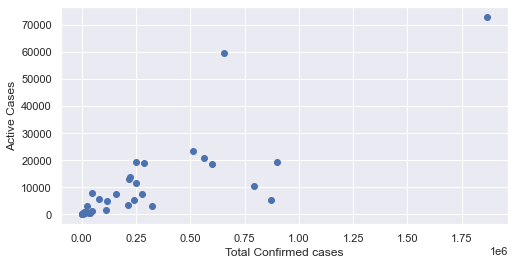

In [255]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(dataset["Total_Confirmed_Cases"], dataset["Active_Cases"])
plt.xlabel("Total Confirmed cases")
plt.ylabel("Active Cases")
plt.show()

(array([15.,  1.,  2.,  1.,  6.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
         0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([      0.        ,   48533.30555556,   97066.61111111,
         145599.91666667,  194133.22222222,  242666.52777778,
         291199.83333333,  339733.13888889,  388266.44444444,
         436799.75      ,  485333.05555556,  533866.36111111,
         582399.66666667,  630932.97222222,  679466.27777778,
         727999.58333333,  776532.88888889,  825066.19444444,
         873599.5       ,  922132.80555556,  970666.11111111,
        1019199.41666667, 1067732.72222222, 1116266.02777778,
        1164799.33333333, 1213332.63888889, 1261865.94444444,
        1310399.25      , 1358932.55555556, 1407465.86111111,
        1455999.16666667, 1504532.47222222, 1553065.77777778,
        1601599.08333333, 1650132.38888889, 1698665.69444444,
        1747199.        ]),
 <a list of 36 Patch o

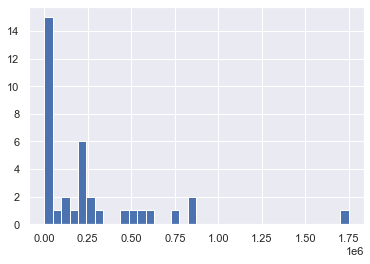

In [149]:
#Histogram plot
plt.hist(dataset["Cured_Discharged_Migrated"],bins=36)

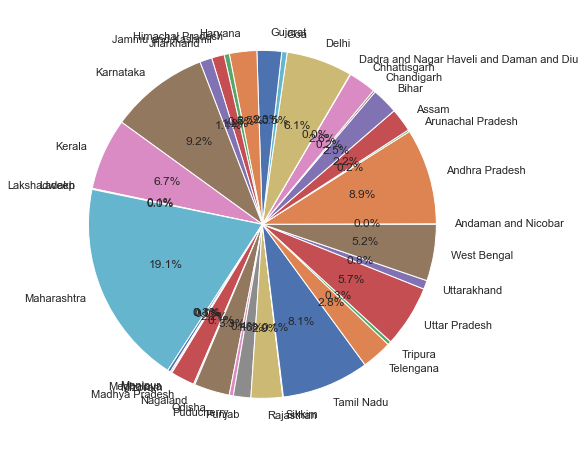

In [150]:
# Pie chart
labels = dataset.Name_of_State_UT
sizes = dataset.Total_Confirmed_Cases
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=0)
plt.show()

## Data Modeling : Linear Regression

In [179]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

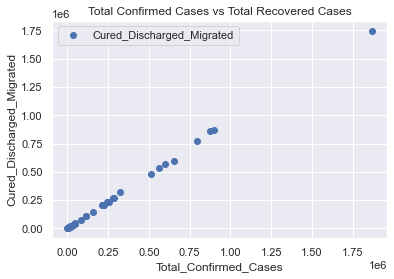

In [180]:
dataset.plot(x='Total_Confirmed_Cases', y='Cured_Discharged_Migrated',style='o')  
plt.title('Total Confirmed Cases vs Total Recovered Cases')  
plt.xlabel('Total_Confirmed_Cases')  
plt.ylabel('Cured_Discharged_Migrated')  
plt.show()

In [181]:
x = dataset['Total_Confirmed_Cases'].values.reshape(-1,1)
y = dataset['Cured_Discharged_Migrated'].values.reshape(-1,1)

In [182]:
x

array([[   4791],
       [ 873995],
       [  16479],
       [ 214305],
       [ 240572],
       [  18410],
       [ 252638],
       [   3354],
       [ 601150],
       [  49131],
       [ 224081],
       [ 249329],
       [  47703],
       [ 114773],
       [ 111003],
       [ 897801],
       [ 654041],
       [   9071],
       [      0],
       [1868172],
       [  26685],
       [  12586],
       [   4008],
       [ 219893],
       [  11602],
       [ 322642],
       [  37363],
       [ 158556],
       [ 287219],
       [   5264],
       [ 795240],
       [ 276516],
       [  32997],
       [ 561161],
       [  80486],
       [ 513752]], dtype=int64)

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [236]:
x_train.shape

(28, 1)

In [237]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression()

In [238]:
#For retrieving the slope:
print(regressor.coef_)

[[0.94391603]]


In [239]:
#For retrieving the slope:
print(regressor.intercept_)

[1000.35592078]


In [240]:
y_pred = regressor.predict(x_test)

In [241]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,267427,262008.240723
1,23397,26188.755167
2,591845,618360.139745
3,772995,751640.139189
4,3800,4783.571367
5,866664,848449.111086
6,206126,212514.003718
7,15739,16555.148170


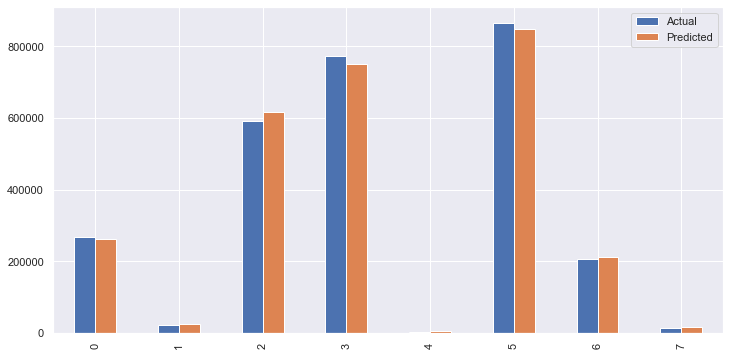

In [252]:
df1 = df.head(8)
df1.plot(kind='bar',figsize=(12,6))

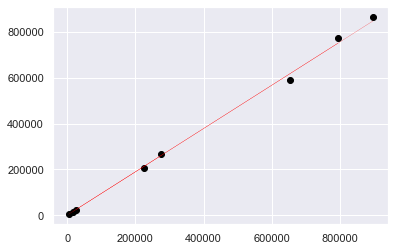

In [253]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='red', linewidth=0.1)
plt.show()

In [254]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 14010.986069433306
